# Chocolate Scraping with Beautiful Soup

This project is followed from the Codecademy Data Science pathway.
The project will work with the following website: https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

The following code is initially provided:

In [2]:
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

A preview of the website we will scrape is included below.
![site preview](site_preview.png)

By inspecting the source code, we can see some potential element to scrape. Some likely candidates would be the `<tr>` and `<td>` elements that compose the table.
![source code preview](source_code_preview.png)

From our python code we can make a request to the site to get the raw HTML, which we can use Beautiful Soup to analyze.

In [7]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
soup = BeautifulSoup(webpage.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

This makes the html source code now easily accesible to us.
To start our analysis, we can look at the number of chcolate bars receiving each rating by creating a histogram of the data.

To do this, we will need to get all of the ratings into a list.
By looking at the HTML code, we observe that all of the chocolate ratings are contained in a `<td>` element with the attribute `class="Rating`.

We will use the `soup` object to extract the text of these elements.

In [12]:
elements = soup.find_all(attrs={"class":"Rating"})
ratings = []
for cell in elements:
    # The first element contains the text "Rating" rather than an actual score
    try:
        score = float(cell.text)
        ratings.append(score)
    except:
        pass

print(ratings)
    

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5, 3.75, 3.5, 3.25, 3.25, 3.5, 3.75, 3.5, 4.0, 4.0, 3.75, 3.25, 3.25, 3.5, 3.5, 3.75, 3.5, 3.75, 4.0, 2.75, 3.25, 3.5, 3.25, 3.75, 4.0, 2.75, 1.75, 3.75, 3.25, 3.25, 3.5, 2.5, 2.75, 1.75, 3.0, 3.0, 3.25, 3.75, 2.75, 3.75, 3.75, 3.75, 3.75, 2.5, 3.0, 3.25, 3.5, 3.0, 2.5, 2.5, 2.75, 3.5, 3.5, 4.0, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 3.25, 3.0, 3.25, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.5, 3.5, 3.25, 3.5, 2.75, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.75, 2.

We can now use matplotlib to visually explore the ratings.

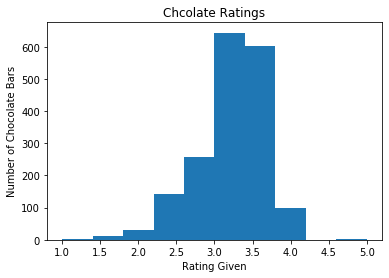

In [15]:
plt.hist(ratings)
plt.title("Chcolate Ratings")
plt.xlabel("Rating Given")
plt.ylabel("Number of Chocolate Bars")
plt.show()

We can see that a ranking between 3.0 and 3.8 were the most often given, while ratings over 4.5 were exceedingly rare, and those less than 1.5 are also quite rare (I mean, a bad chocolate bar is still a chocolate bar, right?)

Now we will try to find out more about those companies that consistently produce the best chocolate bars. To do this, we will convert the table data to a DataFrame which will allow us to easily sort by average company rating.
By looking at the HTML code, we see that the Company `<td>`s all have the class name `Company`.

In [20]:
company_class = soup.select(".Company")
companies = []
# Skip the first element since it contains the column header
for element in company_class[1:]:
    name = element.get_text()
    companies.append(name)
    
choc_df = pd.DataFrame({
    "Company":companies,
    "Rating":ratings
})
print(choc_df)

       Company  Rating
0     A. Morin    3.75
1     A. Morin    2.75
2     A. Morin    3.00
3     A. Morin    3.50
4     A. Morin    3.50
...        ...     ...
1790    Zotter    3.75
1791    Zotter    3.00
1792    Zotter    3.50
1793    Zotter    3.25
1794    Zotter    3.00

[1795 rows x 2 columns]


In [24]:
best_companies = choc_df.groupby("Company").Rating.mean().nlargest(10)
print(best_companies)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


Now we would like to see if higher levels of cacao tend to be rated better overall than those with low levels of cacao.


In [34]:
c_percent_elements = soup.select(".CocoaPercent")
c_percents = []
for element in c_percent_elements[1:]:
    percent = int(float(element.get_text().strip('%')))
    c_percents.append(percent)

# Add this cacao percentage to a new column in the dataframe
choc_df['CocoaPercentage'] = c_percents
print(choc_df)

       Company  Rating  CocalPercentage  CocoaPercentage
0     A. Morin    3.75               63               63
1     A. Morin    2.75               70               70
2     A. Morin    3.00               70               70
3     A. Morin    3.50               70               70
4     A. Morin    3.50               70               70
...        ...     ...              ...              ...
1790    Zotter    3.75               70               70
1791    Zotter    3.00               65               65
1792    Zotter    3.50               65               65
1793    Zotter    3.25               62               62
1794    Zotter    3.00               65               65

[1795 rows x 4 columns]


Now create a scatterplot to visualize the spread of the ratings vs cocoa percentage.

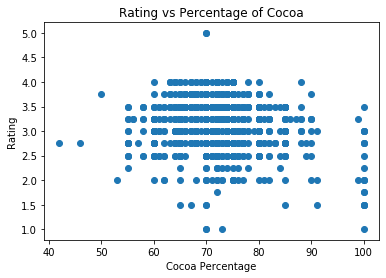

In [44]:
plt.scatter(choc_df.CocoaPercentage, choc_df.Rating)
plt.ylabel('Rating')
plt.xlabel('Cocoa Percentage')
plt.title('Rating vs Percentage of Cocoa')
plt.show()

We can add a linear best-fit line to this plot to better see the overall trend of the data.

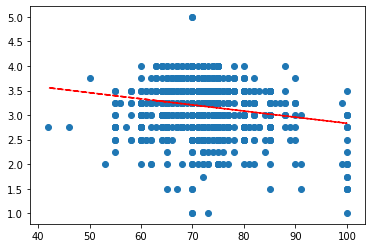

In [45]:
z = np.polyfit(choc_df.CocoaPercentage, choc_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(choc_df.CocoaPercentage, line_function(choc_df.CocoaPercentage), "r--")
plt.scatter(choc_df.CocoaPercentage, choc_df.Rating)
plt.show()